In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import gmres
A = csc_matrix([[3, 2, 0], [1, -1, 0], [0, 5, 1]], dtype=float)
b = np.array([2, 4, -1], dtype=float)
x, exitCode = gmres(A, b)
print(exitCode)            # 0 indicates successful convergence
np.allclose(A.dot(x), b)

0


True

2.1105626818556287e-05


False

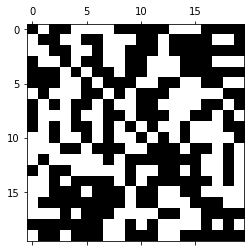

In [18]:
n=20
A=np.random.rand(n,n)
s=.5
A=reshape(A,n**2)
mask=np.random.randint(0,high=100, size=n**2)>=s*100
A[mask]=0
# A=csc_matrix(reshape(A,(n,n)))
A=reshape(A,(n,n))
for i in range(n):
    A[i,i]=np.random.rand()*10
spy(A)
b=np.random.rand(n)
x0=zeros(n)

x0=b*1/diag(A)

x,err=gmres(A,b,x0=x0,maxiter=n,restart=n)
print(norm(A.dot(x)-b))
allclose(A.dot(x),b)


3.18354032461124e-14


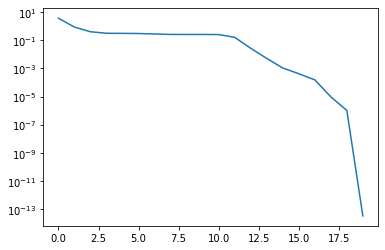

In [6]:
def GMRes2(A, b, x0, e, nmax_iter,matspy=False):
    err=[]
    
    n=len(b)
    
    x=copy(x0)
    r = b - A.dot(x0)

    q=zeros((n,nmax_iter))
    q[:,0] = r / norm(r)

    h = zeros((nmax_iter+1, nmax_iter))

    for k in range(nmax_iter):
        y = A.dot(q[:,k])
        for j in range(k+1):
            h[j, k] = q[:,j].dot(y)
            y = y - h[j, k] * q[:,j]
            
        h[k + 1, k] = norm(y)
        
        if (k != nmax_iter - 1):
            q[:,k + 1] = y / h[k + 1, k]
            
        v = zeros(k+2)
        v[0] = norm(r)
        
        result, residual,rank,s = np.linalg.lstsq(h[:k+2,:], v,rcond=None)
        tmp=q[:,:].dot(result[:])
        
        if(matspy):
            spy(h[:k+2,:])
            show()


        x=x0+tmp
        if(norm(r)<=e):
            return(x,err)
        
        err=err+[norm(A.dot(x)-b)]
        #print(k,norm(A.dot(x)-b))
 
        

    return x,err

nmaxit=n
x0=copy(b)
x,errGMRes2=GMRes2(A, b, x0, 1.e-12, nmaxit,matspy=False)
# norm(A.dot(X)-b)
# h,v=GMRes2(A, b, x0, 1.e-12, nmaxit)

print("")
print(norm(A.dot(x)-b))
plot(errGMRes2)
yscale("log")


3.423529867153136e-14


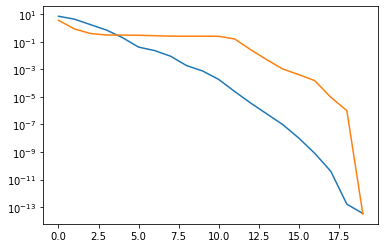

In [19]:
def GMRes2_PC(A, b, x0, M, e, nmax_iter,matspy=False):
    b0=copy(b)
    err=[]
    
    b=M.dot(b)
    
    n=len(b)
    
    x=copy(x0)
    r = b - M.dot(A.dot(x0))

    q=zeros((n,nmax_iter))
    q[:,0] = r / norm(r)

    h = zeros((nmax_iter+1, nmax_iter))

    for k in range(nmax_iter):
        y = M.dot(A.dot(q[:,k]))
        for j in range(k+1):
            h[j, k] = q[:,j].dot(y)
            y = y - h[j, k] * q[:,j]
            
        h[k + 1, k] = norm(y)
        
        if (k != nmax_iter - 1):
            q[:,k + 1] = y / h[k + 1, k]
            
        v = zeros(k+2)
        v[0] = norm(r)
        
        result, residual,rank,s = np.linalg.lstsq(h[:k+2,:], v,rcond=None)
        tmp=q[:,:].dot(result[:])
        
        if(matspy):
            spy(h[:k+2,:])
            show()


        x=x0+tmp
        if(norm(r)<=e):
            return(x,err)
        
        err=err+[norm(A.dot(x)-b0)]
        #print(k,norm(A.dot(x)-b))
 
        

    return x,err

nmaxit=n
x0=copy(b)
M=diag(1/diag(A))
x,errGMRes2_PC=GMRes2_PC(A, b, x0, M, 1.e-12, nmaxit,matspy=False)
# norm(A.dot(X)-b)
# h,v=GMRes2(A, b, x0, 1.e-12, nmaxit)

# M=identity(len(A))
# x,errGMRes2_noPC=GMRes2_PC(A, b, x0, M, 1.e-12, nmaxit,matspy=False)


print("")
print(norm(A.dot(x)-b))
plot(errGMRes2_PC)
plot(errGMRes2)
plot(errGMRes2_noPC)
yscale("log")

In [ ]:
# x=copy(b)
# nmax_iter=10
# restart=13
# for i in range(nmax_iter):
#     x=GMRes2(A, b, x, e, restart) 
#     print(norm(A.dot(x)-b))

# print(norm(A.dot(x)-b))


x0=copy(b)
x=GMRes2(A, b, x0, 1.e-12, 9)
print(norm(A.dot(x)-b))

In [ ]:
tmp=[]
for i in range(1,21):
    X,err=gmres(A, b, x0, tol=1.e-20, maxiter=1,restart=i,callback_type="x")
#     print(i,norm(A.dot(X)-b))
    tmp=tmp+[norm(A.dot(X)-b)]
plot(tmp)
plot(errGMRes2,"r--")
yscale("log")

In [ ]:
def f(x):
    print("x")
# for r in range(1,n+1):
#     X,err=gmres(A, b, x0, tol=1.e-20, maxiter=1,
#                 restart=r,callback_type="x")
#     #print(norm(A.dot(X)-b))

x0=copy(b)
a=[]
for rI in range(n*2):
    X,err=gmres(A, b, x0, tol=1.e-20, maxiter=1,
                restart=n//4,callback_type="x")
    x0=copy(X)
    r=norm(A.dot(X)-b)
    a=a+[r]
print(norm(A.dot(X)-b))
plot(a)
yscale("log")
    
    
X,err=gmres(A, b, x0, tol=1.e-20, maxiter=n*2,restart=n//2,callback_type="x")
print(norm(A.dot(X)-b))

## SVD

In [12]:
n,m=20,15
A=np.random.rand(n,m)
b=np.random.rand(n)

In [13]:
x, residual,rank,s = np.linalg.lstsq(A, b, rcond=None)
norm(A.dot(x)-b)

0.7123124677041163

In [14]:
u,s,vh=svd(A)

In [ ]:
ii=argmin(s)

In [ ]:
norm(A.dot(vh[ii,:])-b)

In [ ]:
for v in vh:
    print(norm(A.dot(v)))

In [15]:
np.linalg.lstsq??